# Day 4-6

* Logistic Regression
* Math behind LR
* Implementing LR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

social_network = pd.read_csv('https://raw.githubusercontent.com/duncip/100-Days-Of-ML-Code/master/datasets/Social_Network_Ads.csv')
social_network.head(2)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [26]:
X = social_network.iloc[ :, [2,3]].values
Y = social_network.iloc[ :, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 1/4, random_state = 0)

## Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Model

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = lr.predict(X_test)

## Confusion matrix

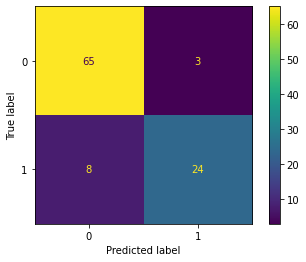

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

In [ ]:
cm

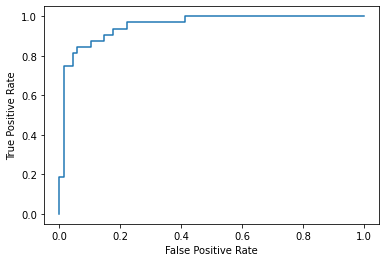

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = lr.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=lr.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

## Different dataset

In [84]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
diabetes = pd.read_csv('../diabetes.csv', header = None, names = col_names, skiprows = 1)

feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = diabetes[feature_cols] # Features
y = diabetes.label # Target variable

diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

In [88]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [89]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

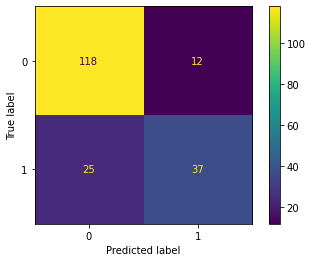

In [92]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

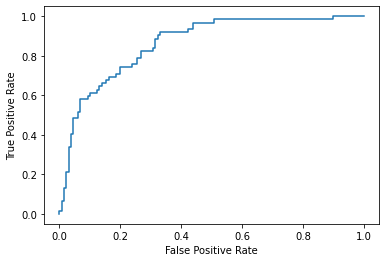

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

y_score = lr.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=lr.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()